<a href="https://colab.research.google.com/github/a-forty-two/cylons/blob/master/05_More_CV_ops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

burp.jpg  sample_data


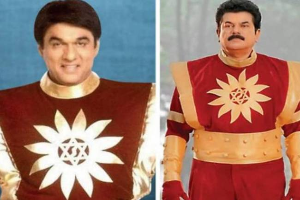

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow
img = cv2.imread('burp.jpg')
img = cv2.resize(img, (300,200))
cv2_imshow(img)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


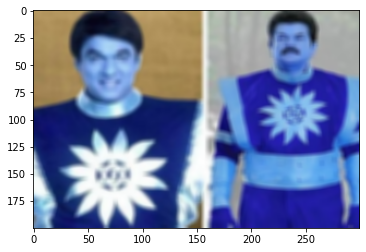

In [20]:
kernel = np.ones((5,5), np.float32) / (5*5)    # NORMALIZING data between 0 and 1
# normalizing will not damage the data -> PIXEL doesn't changes colors in matplotlib
# and other library-> the colors are just references!

print(kernel) # completely, uniform linear kernel
# dimension_depth is the dimension in which operations will happen 
ddepth = -1 # the outermost/last axis of data it finds, it will operate upon! 

# I AM TAKING A SINGLE CHANNEL! the complete image as a single matrix 
# dimesnions[0] -> ddepth of 0 or -1 would have given me same matrix! 

# if i'd have broken this image into R,G,B,Alpha -> then i had 4 channels! ddepth would have to
# solved differently for each channel
# CAMERAS-> RED EYE REMOVAL -> EYE-> RGBA -> ddept=> 0
# if a camera -> GREEN eye effect (imaginary) -> RGBA -> ddepth=> 1
# ddepth of -1 in this case would have controlled TRANSPARENCY! 

img_mod = cv2.filter2D(img, ddepth, kernel)
plt.imshow(img_mod)
#img_mod = cv2.filter2D(img_mod, ddepth, kernel)
#plt.imshow(img_mod)

# if image was originally 100 -> now 100X 0.04 -> 4! 
# image's RGB have all been multiplied with 0.04 
# as a result we feel it's a like a BLUR effect -> DATA LOSS  

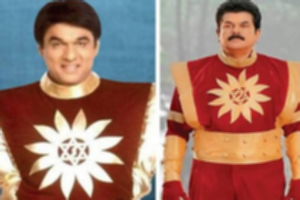

In [16]:
img_blur = cv2.blur(img, (3,3))
cv2_imshow(img_blur)

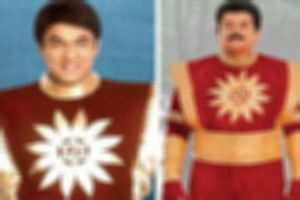

In [17]:
img_blur = cv2.blur(img, (7,7))
cv2_imshow(img_blur)

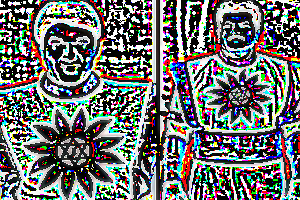

In [23]:
i3 = img - img_blur
cv2_imshow(i3)
# the difference between original image and blurring 
# BLACK -> blur was more intensive
# Order of intensive-> Black -> Red -> Green -> Blue 

In [0]:
# Gaussian Blur (general uniform-distributed function is used 
# to distort the original image) and 
# Radial Blur (radial function -> x2+y2=r2), usually for Zoom effects 
# and Bilateral Blur -> dreamy affect 


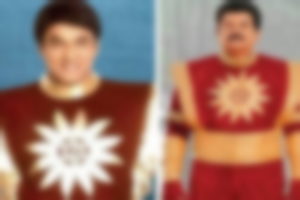

In [31]:
# BLur is applied in many continuous loops -> each loop adding a little blur
img2 = cv2.GaussianBlur(img, (5,5), 0)
# y = x * blur
for i in range(10): # y = x * blur**10
  img2 = cv2.GaussianBlur(img2, (5,5), 0)
# total equation above 
# y1 = input * blur -> before for loop
# y2 = y1 * blur**10  -> for loop
# y2 = input * blur**11 -> final equation
cv2_imshow(img2)

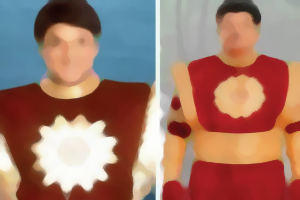

In [42]:
img2 = cv2.medianBlur(img,5) # only square windows to calculate 
for i in range(10): # y = x * blur**10
  img2 = cv2.medianBlur(img2,5)
cv2_imshow(img2)

# different types of blurs https://quincemedia.com/2017/10/04/9-types-of-blur-effects-in-after-effects/ 



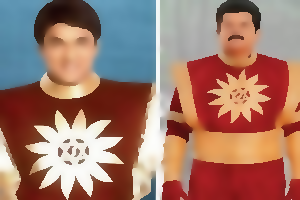

In [44]:
img2 = cv2.bilateralFilter(img,5,75,75) # only square windows to calculate 
for i in range(10): # y = x * blur**10
  img2 = cv2.bilateralFilter(img2,5,75,75) # TV and photo sensoring 
cv2_imshow(img2)

In [25]:
i3

array([[[255, 254, 254],
        [  1,   1,   1],
        [  3,   3,   3],
        ...,
        [  1,   0,   0],
        [  7,   5,   5],
        [  4,   2,   2]],

       [[253, 254, 253],
        [  0,   0,   0],
        [  2,   2,   2],
        ...,
        [255, 254, 255],
        [255, 254, 254],
        [  2,   1,   1]],

       [[253, 254, 253],
        [  0,   1,   0],
        [  2,   2,   2],
        ...,
        [  3,   1,   1],
        [  1,   0,   0],
        [  1,   0,   0]],

       ...,

       [[ 12, 253, 226],
        [ 20,  16,   9],
        [254,   8,  20],
        ...,
        [255, 254, 255],
        [  0, 254, 255],
        [255, 252,   0]],

       [[ 12, 255, 228],
        [  4,   4, 251],
        [246, 255,  12],
        ...,
        [255, 255, 254],
        [254, 254, 254],
        [253, 252, 253]],

       [[  0, 244, 217],
        [250, 248, 240],
        [236, 246, 255],
        ...,
        [  4,   1,   1],
        [  1, 255, 254],
        [255, 252, 253]]